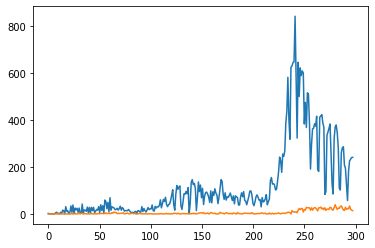

0.6445883427961401   2.8622283342194676e-36


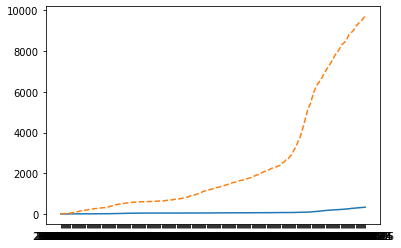

      0              1              2     3     4    5
0     2     Banja Luka      Бања Лука  9714  4438  330
1     5      Bijeljina       Бијељина  3917  1877  112
2   119        Zvornik        Зворник  1832  1099   62
3   107       Trebinje        Требиње  1532   630   45
4     8       Gradiška       Градишка  1315   690   74
..  ...            ...            ...   ...   ...  ...
57   12         Drinić         Дринић    20     2    1
58   72    Donji Žabar     Доњи Жабар    18     2    4
59   34     Pelagićevo     Пелагићево     8     1    0
60  105  Istočni Drvar  Источни Дрвар     3     2    0
61   55  Kupres-Blagaj  Купрес-Благај     2     0    1

[62 rows x 6 columns]
               Mjesto  Novi  Umrli  Oporavljeni  Testirani  Kriticni
0          Banja Luka    60      3            0          0         0
1           Bijeljina    34      1            0          0         0
2            Trebinje    25      1            0          0         0
3               Doboj    21      1       

ValueError: Expected object or value

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

from scipy.stats import pearsonr


podaci = pd.read_json("../data-etfbl/podaci-rs.txt" )

pt.plot( np.linspace(0, 297, 297), podaci["novi"] )
pt.plot( np.linspace(0, 297, 297), podaci["umrli"] )

pt.show()
podaci

koef, pval = pearsonr(podaci["novi"], podaci["umrli"])
print(koef, " ", pval) # koef = 0.645

# po gradu (Banja Luka):
#podaci_po_gradovima = pd.read_json("../data-etfbl/podaci_po_gradovima.txt" )
#podaci_po_gradovima

#gradovi:
gradovi = pd.read_json("../data-etfbl/mjesta.txt" )
gradovi

# kumulativno (gradovi) ===> ovdje samo za Banja Luka
kumulativno_po_gradovima = pd.read_json("../data-etfbl/kumulativno-gradovi-2.txt" )
kumulativno_po_gradovima.columns = ["datum", "zarazenih", "umrlih", "aktivnih",  "k1", "k2"]
kumulativno_po_gradovima = kumulativno_po_gradovima.sort_values(by=["datum"])

pt.plot(kumulativno_po_gradovima["datum"], kumulativno_po_gradovima["umrlih"] )
pt.plot(kumulativno_po_gradovima["datum"], kumulativno_po_gradovima["zarazenih"], "--" )
pt.show()

#dnevni-podaca-gradovi.txt
dnevni_podaci_gradovi = pd.read_json("../data-etfbl/dnevni-podaca-gradovi.txt" )
print(dnevni_podaci_gradovi)

# citanje po podacima: 26.12.2020. (konkretno)
podaci_2020_12_26 = pd.read_json("../data-etfbl/2020-12-26.txt")
print(podaci_2020_12_26)
# 25.12.2020.
podaci_2020_12_25 = pd.read_json("../data-etfbl/2020-12-25.txt")
print(podaci_2020_12_25)


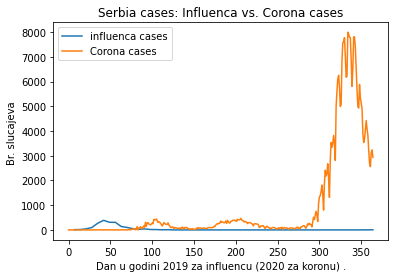

      Date_reported Country_code Country WHO_region  New_cases  \
82593    2020-01-03           RS  Serbia       EURO          0   
82594    2020-01-04           RS  Serbia       EURO          0   
82595    2020-01-05           RS  Serbia       EURO          0   
82596    2020-01-06           RS  Serbia       EURO          0   
82597    2020-01-07           RS  Serbia       EURO          0   
...             ...          ...     ...        ...        ...   
82953    2020-12-28           RS  Serbia       EURO       2693   
82954    2020-12-29           RS  Serbia       EURO       2559   
82955    2020-12-30           RS  Serbia       EURO       3136   
82956    2020-12-31           RS  Serbia       EURO       3236   
82957    2021-01-01           RS  Serbia       EURO       2932   

       Cumulative_cases  New_deaths  Cumulative_deaths  
82593                 0           0                  0  
82594                 0           0                  0  
82595                 0           0 

In [94]:
# COVID cases vs. INFLUENCA cases (Serbia for now considered)

import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

flu_serbia = pd.read_csv("../data/flu_serbia.csv")
flu_serbia_y2020 = flu_serbia[flu_serbia["Year"] == 2019] 
flu_serbia_y2020_w10 = flu_serbia_y2020[flu_serbia_y2020["Week"] >= 0 ] 
#print(flu_serbia_y2020_w10)

pt.plot(flu_serbia_y2020_w10["Week"] * 7, flu_serbia_y2020_w10["INF_A"], label="influenca cases" )
pt.xlabel("Dan u godini 2019 za influencu (2020 za koronu) .")
pt.ylabel("Br. slucajeva ")
pt.title("Serbia cases: Influenca vs. Corona cases")

# korona podaci i odnos:
# who podaci: WHO-COVID-19-global-data.csv
# start with March (firs positive COVID case)
shift = 0
who_dat = pd.read_csv("../data/WHO-COVID-19-global-data.csv")
who_dat_serbia = who_dat[ who_dat["Country"] == "Serbia"  ]
who_dat_serbia_pos = who_dat_serbia #[who_dat_serbia["New_cases"] > 0   ]
who_dat_serbia_pos = who_dat_serbia_pos[shift: (shift + 365) ]
pt.plot( range(shift, (who_dat_serbia_pos["New_cases"].shape[ 0 ] + shift), 1), who_dat_serbia_pos["New_cases"].values, label="Corona cases" )
pt.legend()
pt.show()

# corelation between corona cases in (2020) and influenca cases in 2019: all for Serbia 

from scipy.stats import spearmanr  
print(who_dat_serbia_pos)

cumul_by_week_serbia = []
for i in range(len(who_dat_serbia_pos) // 7 ):
    cumul_by_week_serbia.append(who_dat_serbia_pos["New_cases"][ i*7 :  (i+1) * 7 ].mean())
    
value, pval = spearmanr(flu_serbia_y2020_w10["INF_A"].values, cumul_by_week_serbia  )
print("koef corel: ", value, " ", " pval: ", pval)


In [44]:
"""
from sklearn import datasets 
import pandas as pd


def model(b_0, c_1, podaci):
    return b_0 + c_1 * podaci


data = datasets.load_boston()
X = data.data # 506 instanci
Y = data.target
# prelazak sa nizova i matrica na dataframe 
X = pd.DataFrame(X,  columns=data.feature_names)
Y = pd.DataFrame(Y, columns=["target"])
#Y
print(X.describe()) # razlicit domen vrijednosti atributa
#X.corr()
# distribucija podataka za kolone 
X.hist(figsize=(15,15) )
# podjela trening ==> test podaci 
from sklearn import model_selection 

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 7)

# skaliranje podataka ==> na istu skalu ====> standardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)  #.values.reshape(-1, 1))
X_train = scaler.transform(X_train) #.values).reshape(-1, 1))
X_test = scaler.transform(X_test) #.values).reshape(-1,1))

# modelovanje:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

# metrika (koliko je model dobar:)

from sklearn import metrics 

score = metrics.r2_score(y_predict, Y_test)
print(score)

# cuvanje modela:
import pickle
model_filename = 'boston_houses.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(model, pickle_file)
# CUVANJE SKALERA:
scaler_filename = 'models/boston_houses.scaler'
with open(scaler_filename, 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-44-1b969949960c>, line 57)